**Forecasting Unit Sales (Task 1)**

Loading datasets

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# EDA
print(train_df.head())
print(train_df.describe())
print(train_df.info())



                      ID        date     Item Id  \
0  2022-04-12_B09KDTS4DC  2022-04-12  B09KDTS4DC   
1  2022-04-12_B09MR2MLZH  2022-04-12  B09MR2MLZH   
2  2022-04-12_B09KSYL73R  2022-04-12  B09KSYL73R   
3  2022-04-12_B09KT5HMNY  2022-04-12  B09KT5HMNY   
4  2022-04-12_B09KTF8ZDQ  2022-04-12  B09KTF8ZDQ   

                                           Item Name  ad_spend anarix_id  \
0  NapQueen Elizabeth 8" Gel Memory Foam Mattress...       NaN  NAPQUEEN   
1  NapQueen 12 Inch Bamboo Charcoal Queen Size Me...       NaN  NAPQUEEN   
2     NapQueen Elsa 8" Innerspring Mattress, Twin XL       NaN  NAPQUEEN   
3        NapQueen Elsa 6" Innerspring Mattress, Twin       NaN  NAPQUEEN   
4     NapQueen Elsa 6" Innerspring Mattress, Twin XL       NaN  NAPQUEEN   

   units  unit_price  
0    0.0         0.0  
1    0.0         0.0  
2    0.0         0.0  
3    0.0         0.0  
4    0.0         0.0  
           ad_spend         units     unit_price
count  77303.000000  83592.000000  101490.0

Plotting different graphs using EDA

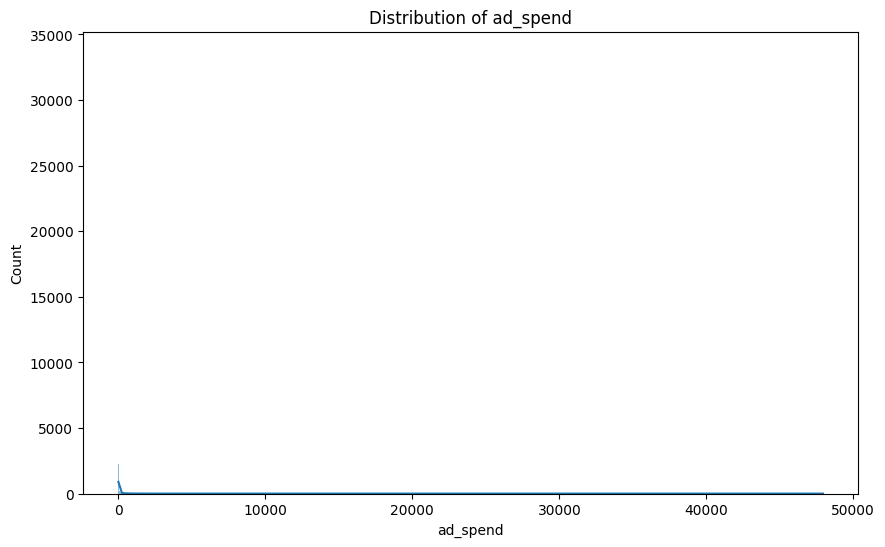

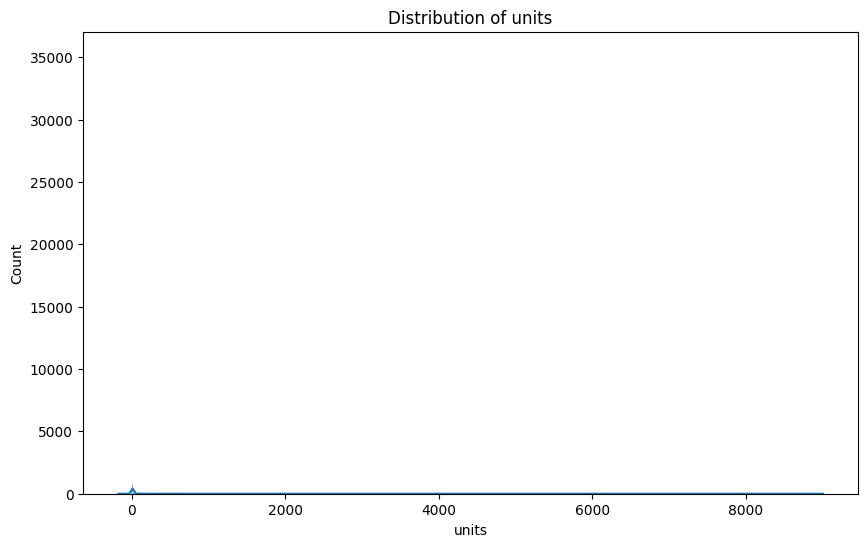

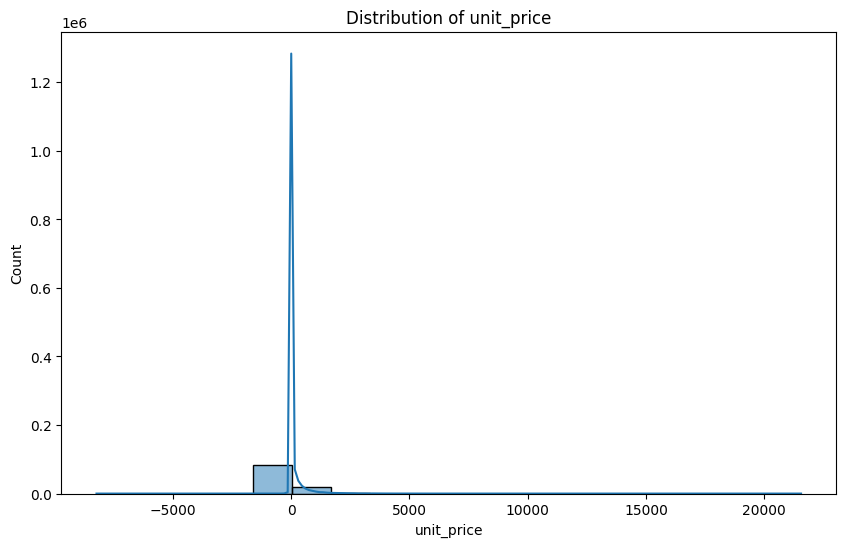

In [16]:
# Plotting distributions of numerical features
numerical_features = ['ad_spend', 'units', 'unit_price']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()



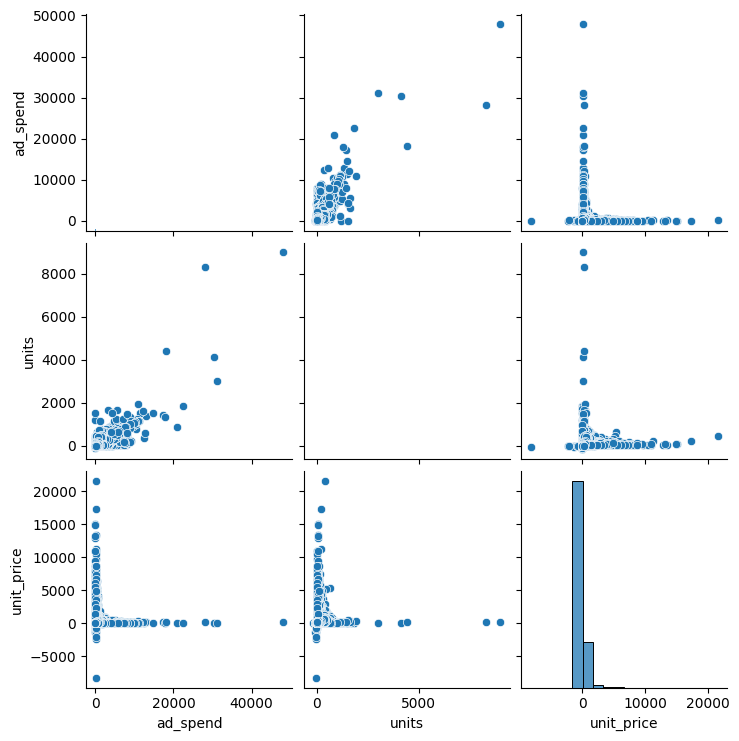

In [17]:
# Plotting relationships
sns.pairplot(train_df[numerical_features])
plt.show()



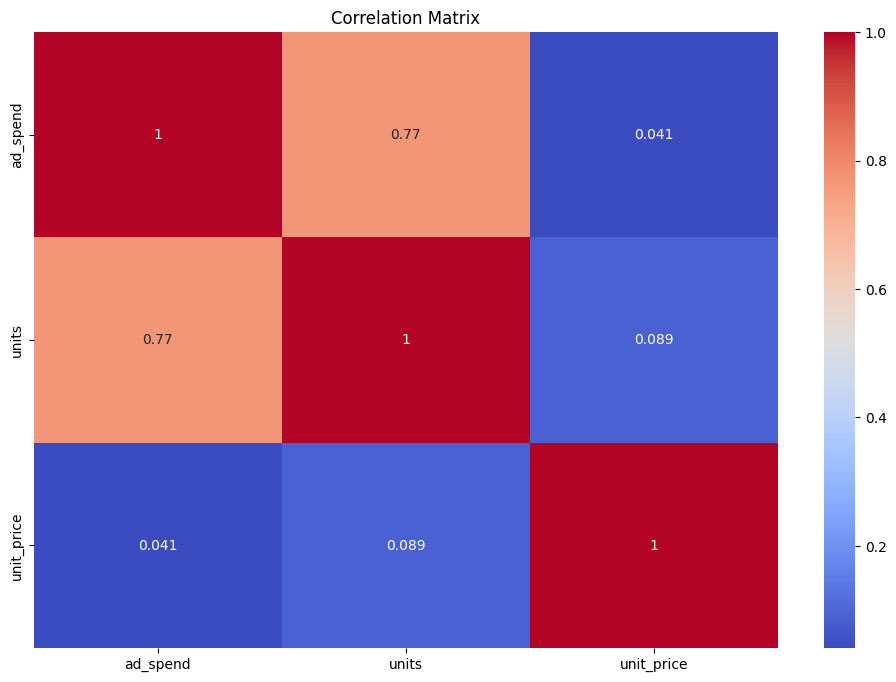

In [18]:
# Correlation matrix
numerical_df = train_df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm') # Calculate correlation on numerical_df
plt.title('Correlation Matrix')
plt.show()



Preprocessing data

In [19]:
# Preprocess the data
# Convert date to datetime
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

# Handle categorical variables
label_encoder = LabelEncoder()
train_df['Item Name'] = label_encoder.fit_transform(train_df['Item Name'])
test_df['Item Name'] = label_encoder.transform(test_df['Item Name'])

# Handle missing values if any
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)



Feature Engineering

In [20]:
# Feature engineering
# Extract date features
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day

test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day



In [27]:
# Select features and target
features = [ 'ad_spend', 'unit_price', 'year', 'month', 'day']
target = 'units'

X = train_df[features]
y = train_df[target]

X_test = test_df[features]



Standardization

In [28]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)




Model building and Hyperperameter Tuning

In [30]:
# Model selection and hyperparameter tuning
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}



Model Evaluation

In [31]:
# Perform Grid Search CV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}')

# Model evaluation
y_pred_val = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred_val)
print(f'Mean Squared Error on validation set: {mse}')

# Make predictions
y_pred_test = best_model.predict(X_test)

# Prepare the submission
submission = sample_submission.copy()
submission['TARGET'] = y_pred_test
submission.to_csv('submission.csv', index=False)

Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error on validation set: 1035.364977952526
